In [1]:
%pylab inline
import os
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [60]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [61]:
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [62]:
#data split : train, val, test. In addition we'll create a small development
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# The validation set will be num_validation points from the original
# training set

mask = range(num_training, num_training+num_validation)
X_val = X_train[mask]
y_val = y_train[mask]


# The training set will be num_train points from the original
# training set
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]


# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000, 1)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 1)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000, 1)


In [66]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

print(X_train[0].shape)

Training data shape:  (49000, 3073)
Validation data shape:  (1000, 3073)
Test data shape:  (1000, 3073)
dev data shape:  (500, 3073)
(3073,)


[130 135 132 130 135 131 130 136 132 131]


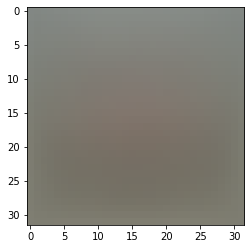

In [64]:
# Preprocessing: subtract the mean image
# compute the mean image
mean_image = np.mean(X_train, axis=0).astype('uint8')
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

# subtract the mean image
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image


# append the bias dim of ones so that SVM only has to worry about optimizing a single weight matrix M

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])



In [1]:
class SVM:
    def __init__(self):
        pass
    
    def svm_loss_naive(self, W, X, y):
        
        """
        W - (D, C)
        X - (N, D)
        """
        # initialize the grad as 0
        dW = np.zeros(W.shape)
        
        # compute the loss and gradient
        num_train = X.shape[0]
        num_classes = X.shape[1]
        for i in range(num_train):
            scores = X[i].dot(W) # scores for 1 training example
            correct_class_score = scores[y[i]]
            for j in range(num_classes):
                if j == y[i]:
                    continue
                margin = scores[j] - correct_class_score + 1 #delta = 1
                if margin > 0:
                    loss += margin
                    dW[:, y[i]] -= X[i]
                    dW[:, j] += X[i]
        loss /= num_train
        dW /= num_train
        
        # regularization
        loss += reg * np.sum(W * W)
        dW += reg*W
        
        return loss
        

In [67]:
W = np.zeros((100, 3))
dW = np.zeros(W.shape)

In [77]:
dW[1] = -2

In [81]:
dW[:, 1]

array([-1., -2., -1.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])